# Time Exieded is 6 seconds

In [184]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
df=pd.read_csv('/content/StudentsPerformance.csv')

# Studing data

In [186]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [187]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [188]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [189]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [190]:
df['Average']=(df['math score']+df['writing score']+df['reading score'])/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


Text(0.5, 0.98, 'Exam scores')

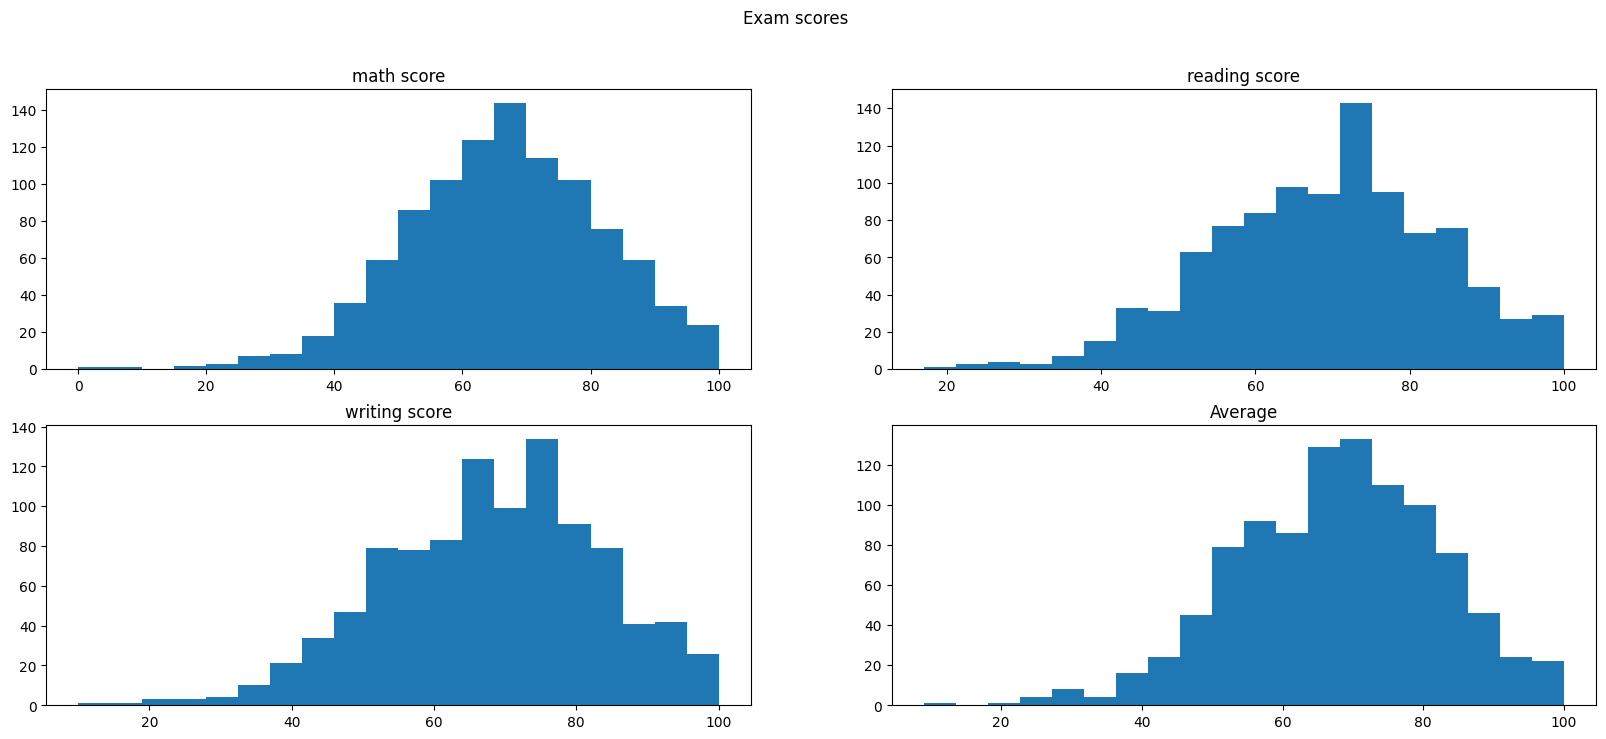

In [191]:
fig,axs = plt.subplots(2,2,figsize=(20,8))
#create histogram
axs[0][0].hist(df['math score'],bins=20)
axs[0][1].hist(df['reading score'],bins=20)
axs[1][0].hist(df['writing score'],bins=20)
axs[1][1].hist(df['Average'],bins=20)
#setting title
axs[0][0].set_title('math score')
axs[0][1].set_title('reading score')
axs[1][0].set_title('writing score')
axs[1][1].set_title('Average')
fig.suptitle("Exam scores")

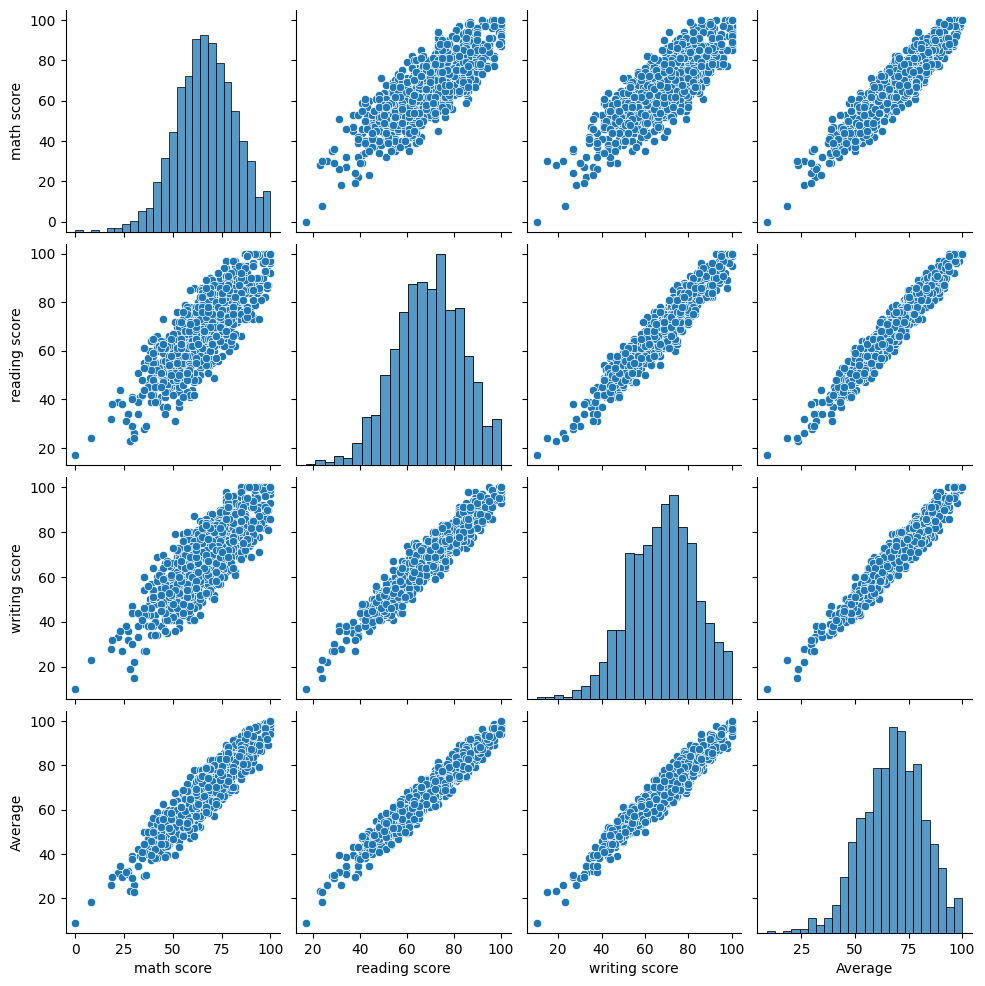

In [192]:
sns.pairplot(df)

# Preprocessing


## Dummy Variable Encoding
###(1) 'gender': male & female 
###(2) 'test preparation course': completed & none 


In [193]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [194]:
# df1=pd.get_dummies(df['gender'])
# df=pd.concat([df1,df],axis=1)
# df.drop(['gender'],axis=1,inplace=True)

df['gender'].replace({"male":'1','female':'2'},inplace=True)

df['race/ethnicity'].replace({'group A':'1','group B':'2', 'group C':'3',
                               'group D':'4','group E':'5'},inplace=True)

df['parental level of education'].replace({"bachelor's degree":'1','some college':'2', "master's degree":'3',"associate's degree":'4','high school':'5','some high school':'5'},inplace=True)

# df['test preparation course']=df['test preparation course'].apply(lambda x:1 if x=="completed"  else 0 )
df['test preparation course']=[1 if x=="completed"  else 0 for x in  df['test preparation course']]
df['lunch']=[1 if x=="standard"  else 0 for x in  df['lunch']]
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
0,2,2,1,1,0,72,72,74,72.666667
1,2,3,2,1,1,69,90,88,82.333333
2,2,2,3,1,0,90,95,93,92.666667
3,1,1,4,0,0,47,57,44,49.333333
4,1,3,2,1,0,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,2,5,3,1,1,88,99,95,94.000000
996,1,3,5,0,0,62,55,55,57.333333
997,2,3,5,0,1,59,71,65,65.000000
998,2,4,2,1,1,68,78,77,74.333333


## Encoding 'race/ethnicity'



In [195]:
# df['race/ethnicity'].unique()

In [196]:
# df1=[]
# for index,row in enumerate(df['race/ethnicity']):
#   if row=='group A': row='A'  
#   elif row=='group B': row='B'
#   elif row=='group C': row='C' 
#   elif row=='group D': row='D'
#   elif row=='group E': row='E'
#   df1.append(row)

In [197]:
# df['race/ethnicity']=[row for row in df1]
# df['race/ethnicity'].unique()

In [198]:
#df

# Train & Valid & Test

In [199]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
0,2,2,1,1,0,72,72,74,72.666667
1,2,3,2,1,1,69,90,88,82.333333
2,2,2,3,1,0,90,95,93,92.666667
3,1,1,4,0,0,47,57,44,49.333333
4,1,3,2,1,0,76,78,75,76.333333


In [200]:
X=df.iloc[:,:-3]
y=df['Average']
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score
0,2,2,1,1,0,72
1,2,3,2,1,1,69
2,2,2,3,1,0,90
3,1,1,4,0,0,47
4,1,3,2,1,0,76


In [201]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [202]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)
# X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2,random_state=42)

# Linear (Polynomial) Regression

---
## *Optional*



In [203]:
# from sklearn.preprocessing import PolynomialFeatures
# scalar=PolynomialFeatures(degree=2)
scalar=StandardScaler()

X_train=scalar.fit_transform(X_train)

X_test=scalar.transform(X_test)

X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [204]:
# create linear regression object
linear=LinearRegression()

# train the model
linear.fit(X_train,y_train)

y_pred=linear.predict(X_test)

print("coef: ",linear.coef_)#->> coef is m and intercept is b in the function mx+b 
print("intercept:",linear.intercept_)

coef:  [ 4.05381699 -0.34858654 -0.27500532 -0.58444995  1.08957238 13.46019883]
intercept: 68.37380952380953


In [205]:
msq=mean_squared_error(y_test,y_pred)
rmsq=(mean_squared_error(y_test,y_pred))**0.5
mae=mean_absolute_error(y_test,y_pred)
rsq=r2_score(y_test,y_pred)


print('mean squared error: ',msq)
print('mean absolute error: ',mae)
print('root mean squared error: ',rmsq)
print('rsq: ',rsq)

mean squared error:  13.09619058401139
mean absolute error:  2.8765399989156126
root mean squared error:  3.618865925122315
rsq:  0.941906837403843


# Decision Tree

In [206]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn import tree
from sklearn.tree import plot_tree

In [207]:
regrressor = DecisionTreeRegressor(random_state = 42, max_depth=5)

regrressor=regrressor.fit(X_train,y_train)

y_pred=regrressor.predict(X_test)
print('test: ',r2_score(y_pred,y_test))

test:  0.8914824413096496


In [208]:
# plt.figure(figsize=(12,12))
# tree.plot_tree(regrressor, fontsize=100)
# tree.plot_tree(regrressor)
# plt.show()

# Random Forest

In [209]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100)
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test) 

# R^2 Score
print("R_square score: ", r2_score(y_test,y_pred))

R_square score:  0.916097552507335


# Linear regression = 94.19%
# Polynomial regression = 88.95% with degree=2
# Decision Tree = 89.15%
# Random Forest = 91.54%

# So the best model is Linear regression 

# Thanks
# Mahmoud Abdelfatah
